## Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('adzuna_jobs_india_multi_role.csv')

In [3]:
data.head()

,search_role,title,company,location,description,salary_min,salary_max,created,category
0,data analyst,Data Analyst,Fuzen IT Solutions,"Hyderabad, Telangana",Company Description Fuzen IT Solutions is a gl...,NaN,NaN,2025-12-05T01:15:54Z,IT Jobs
1,data analyst,Data Analyst,Live Connections,"Bangalore, Karnataka",Role - Data Analyst Experience - 6 to 12 years...,NaN,NaN,2025-12-25T13:39:22Z,IT Jobs
2,data analyst,Data Analyst,LogFix SCM Solutions Pvt Ltd,"Bangalore, Karnataka",Job Description: Data Analyst – AI Systems Abo...,NaN,NaN,2025-12-24T10:18:38Z,IT Jobs
3,data analyst,Data Analyst,VXI Global Solutions,"Tamil Nadu, India",Job Title: Data Analyst Job Description : As a...,NaN,NaN,2025-12-20T08:59:32Z,IT Jobs
4,data analyst,Data Analyst,EXL,"Chennai, Tamil Nadu",Data Analyst We are looking for highly motivat...,NaN,NaN,2025-12-12T09:53:35Z,IT Jobs


In [4]:
data['salary_min'].isnull().sum()

np.int64(3003)

In [5]:
data.shape

(3481, 9)

In [6]:
data['salary_max'].isnull().sum()

np.int64(3003)

In [7]:
data.shape

(3481, 9)

In [8]:
data['created'].min()

'2019-05-17T21:02:39Z'

In [9]:
data['created'].max()

'2025-12-27T12:23:58Z'

In [10]:
data['title'].value_counts()

title
Business Analyst                                  319
Data Analyst                                      219
Data Scientist                                    128
Senior Data Analyst                                56
Data Engineer                                      49
                                                 ... 
Product Manager / product owner                     1
Senior Risk Techno Functional Consultant            1
Life Insurance                                      1
Product Manager [T500-21658]                        1
Quant / Financial Engineer - Model maintenance      1
Name: count, Length: 2014, dtype: int64

In [11]:
data['location'].value_counts()

location
Bangalore, Karnataka     915
India                    864
Hyderabad, Telangana     405
Pune, Maharashtra        262
Mumbai, Maharashtra      213
                        ... 
Andhra Pradesh, India      1
Valsad, Gujarat            1
Udaipur, Rajasthan         1
Chavakkad, Thrissur        1
Haryana, India             1
Name: count, Length: 128, dtype: int64

In [12]:
data['description'][0]

'Company Description Fuzen IT Solutions is a global leader in leveraging advanced machine learning, artificial intelligence, and data science to deliver transformative business results. With a strong presence across Europe, the UK, and the USA, the company also operates a scalable delivery hub in India, specializing in data science, artificial intelligence, and statistics. Established in 2018, the India facility serves global clients while offering corporate and professional training in data sci…'

In [13]:
data['description_cleaned'] = data['description'].str.lower()

In [14]:
data['description_cleaned'] = data['description_cleaned'].str.replace(r'\[.*?\]', '', regex=True)

In [15]:
data['description_cleaned'] = data['description_cleaned'].str.replace(r'[^\w\s]', '', regex=True)

In [16]:
data.head(1)

,search_role,title,company,location,description,salary_min,salary_max,created,category,description_cleaned
0,data analyst,Data Analyst,Fuzen IT Solutions,"Hyderabad, Telangana",Company Description Fuzen IT Solutions is a gl...,NaN,NaN,2025-12-05T01:15:54Z,IT Jobs,company description fuzen it solutions is a gl...


## Spacy

In [17]:
import sys

# installs model into the same environment the kernel uses
!{sys.executable} -m pip install en_core_web_sm
!{sys.executable} -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.5 MB/s  0:00:04a 0:00:01m eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [19]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [20]:
def token_lemma_nonstop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop]
    output = ' '.join(output)
    return output

In [21]:
test_series = data['description_cleaned']

In [22]:
test_series.apply(token_lemma_nonstop)

0       company description fuzen solution global lead...
1       role   datum analyst experience   6 12 year wo...
2       job description datum analyst   ai system role...
3       job title datum analyst job description   data...
4       datum analyst look highly motivated analytic p...
                              ...                        
3476    job role d   ex47009422 job role text sr softw...
3477    supercharge career tableau system engineer tec...
3478    description opportunity impact career provide ...
3479    senior software engineer   ui location bengalu...
3480    merqube establish 2019 executive globally reco...
Name: description_cleaned, Length: 3481, dtype: object

In [23]:
def filter_pos(text, pos_list=['NOUN', 'PROPN']):
    doc = nlp(text)
    output = [token.text for token in doc if token.pos_ in pos_list]
    output = ' '.join(output)
    return output

In [24]:
def nlp_pipeline(series):
    output = lower_replace(series)
    output = output.apply(token_lemma_nonstop)
    output = output.apply(filter_pos)
    return output

In [25]:
def lower_replace(series):
    output = series.str.lower()
    output = output.str.replace(r'\[.*?\]', '', regex=True)
    output = output.str.replace(r'[^\w\s]', '', regex=True)
    return output

In [26]:
def nlp_pipeline(series):
    output = lower_replace(series)
    output = output.apply(token_lemma_nonstop)
    output = output.apply(filter_pos)
    return output

In [27]:
nlp_pipeline(test_series)

0       company description fuzen solution leader leve...
1       role datum analyst experience year work locati...
2       job description datum analyst system role data...
3       job title datum analyst job description data a...
4       datum analyst role business consultant team da...
                              ...                        
3476    job role d job role text sr software engineer ...
3477    career tableau system engineer technoidentity ...
3478    description opportunity impact career adventur...
3479    software engineer ui location bengaluru noida ...
3480    merqube executive technology forefront disrupt...
Name: description_cleaned, Length: 3481, dtype: object

In [28]:
data.head()

,search_role,title,company,location,description,salary_min,salary_max,created,category,description_cleaned
0,data analyst,Data Analyst,Fuzen IT Solutions,"Hyderabad, Telangana",Company Description Fuzen IT Solutions is a gl...,NaN,NaN,2025-12-05T01:15:54Z,IT Jobs,company description fuzen it solutions is a gl...
1,data analyst,Data Analyst,Live Connections,"Bangalore, Karnataka",Role - Data Analyst Experience - 6 to 12 years...,NaN,NaN,2025-12-25T13:39:22Z,IT Jobs,role data analyst experience 6 to 12 years w...
2,data analyst,Data Analyst,LogFix SCM Solutions Pvt Ltd,"Bangalore, Karnataka",Job Description: Data Analyst – AI Systems Abo...,NaN,NaN,2025-12-24T10:18:38Z,IT Jobs,job description data analyst ai systems about...
3,data analyst,Data Analyst,VXI Global Solutions,"Tamil Nadu, India",Job Title: Data Analyst Job Description : As a...,NaN,NaN,2025-12-20T08:59:32Z,IT Jobs,job title data analyst job description as a d...
4,data analyst,Data Analyst,EXL,"Chennai, Tamil Nadu",Data Analyst We are looking for highly motivat...,NaN,NaN,2025-12-12T09:53:35Z,IT Jobs,data analyst we are looking for highly motivat...


In [29]:
data['description_cleaned'] = nlp_pipeline(test_series)

In [30]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer()
dtm = cv.fit_transform(test_series)
dtm_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm_df

,00,000,01,01530,015days,02,0230,02nd,030,03045,...,کو,کہ,کی,کیا,کے,گھر,گے,ہیں,ہے,یہ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
cv2 = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=.2, max_df=.8)
dtm2 = cv2.fit_transform(test_series)
dtm_df2 = pd.DataFrame(dtm2.toarray(), columns=cv2.get_feature_names_out())
dtm_df2

,analyst,business,data,experience,job,location,responsibilities,role,solutions,team,work,years
0,0,1,3,0,0,0,0,0,1,0,0,0
1,3,0,3,2,1,1,0,1,0,1,1,2
2,2,0,5,0,1,0,1,1,0,1,0,0
3,2,1,3,1,2,0,0,1,1,0,2,0
4,2,1,4,1,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3476,0,0,0,0,3,0,0,2,1,0,0,0
3477,0,2,1,0,0,0,0,0,1,2,0,0
3478,0,0,0,0,0,0,0,0,0,2,0,0
3479,0,0,0,1,0,1,1,0,0,1,1,0


In [34]:
term_freq = dtm_df2.sum()
term_freq

analyst             1166
business            2398
data                4406
experience          1915
job                 1384
location             881
responsibilities     857
role                1882
solutions           1173
team                1241
work                 966
years               1066
dtype: int64

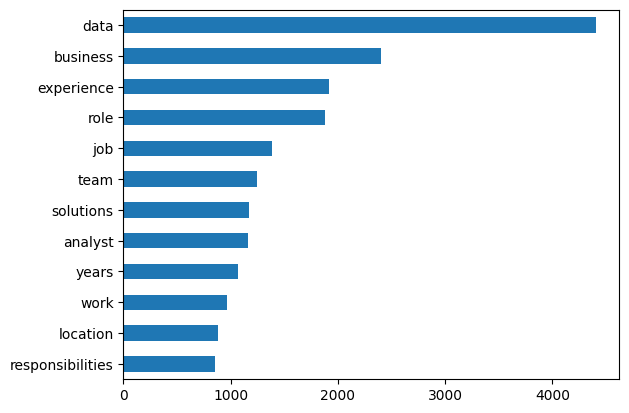

In [35]:
term_freq.sort_values().plot(kind='barh');

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
tfidf = tv.fit_transform(test_series)
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tv.get_feature_names_out())
tfidf_df

,00,000,01,01530,015days,02,0230,02nd,030,03045,...,کو,کہ,کی,کیا,کے,گھر,گے,ہیں,ہے,یہ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
tv2 = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=.2)
tfidf2 = tv2.fit_transform(test_series)
tfidf_df2 = pd.DataFrame(tfidf2.toarray(), columns=tv2.get_feature_names_out())
tfidf_df2

,analyst,business,data,experience,job,location,responsibilities,role,solutions,team,work,years
0,0.000000,0.311178,0.874785,0.000000,0.000000,0.000000,0.000000,0.000000,0.371375,0.000000,0.000000,0.000000
1,0.599791,0.000000,0.442319,0.337445,0.182549,0.199540,0.000000,0.159592,0.000000,0.186524,0.203523,0.394858
2,0.436776,0.000000,0.805256,0.000000,0.199402,0.000000,0.221646,0.174326,0.000000,0.203743,0.000000,0.000000
3,0.456136,0.179486,0.504570,0.192468,0.416482,0.000000,0.000000,0.182053,0.214207,0.000000,0.464332,0.000000
4,0.479493,0.188677,0.707210,0.202324,0.000000,0.000000,0.000000,0.191375,0.225176,0.223670,0.000000,0.236748
...,...,...,...,...,...,...,...,...,...,...,...,...
3476,0.000000,0.000000,0.000000,0.000000,0.828384,0.000000,0.000000,0.482806,0.284039,0.000000,0.000000,0.000000
3477,0.000000,0.579193,0.271371,0.000000,0.000000,0.000000,0.000000,0.000000,0.345619,0.686615,0.000000,0.000000
3478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
3479,0.000000,0.000000,0.000000,0.391564,0.000000,0.463084,0.470911,0.000000,0.000000,0.432875,0.472326,0.000000


In [38]:
term_freq4 = tfidf_df2.sum()

In [39]:
term_freq4 = term_freq4.sort_values()

<Axes: >

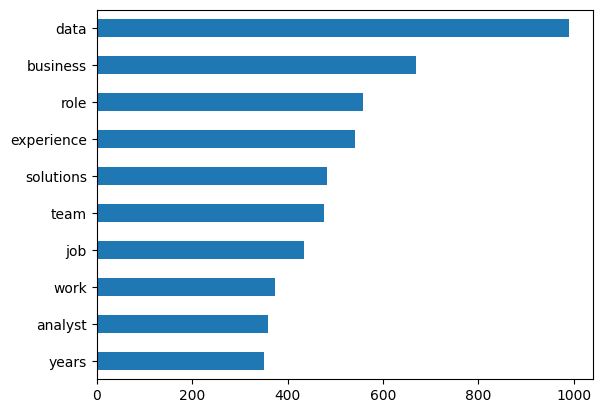

In [40]:
term_freq4.sort_values().tail(10).plot(kind='barh')

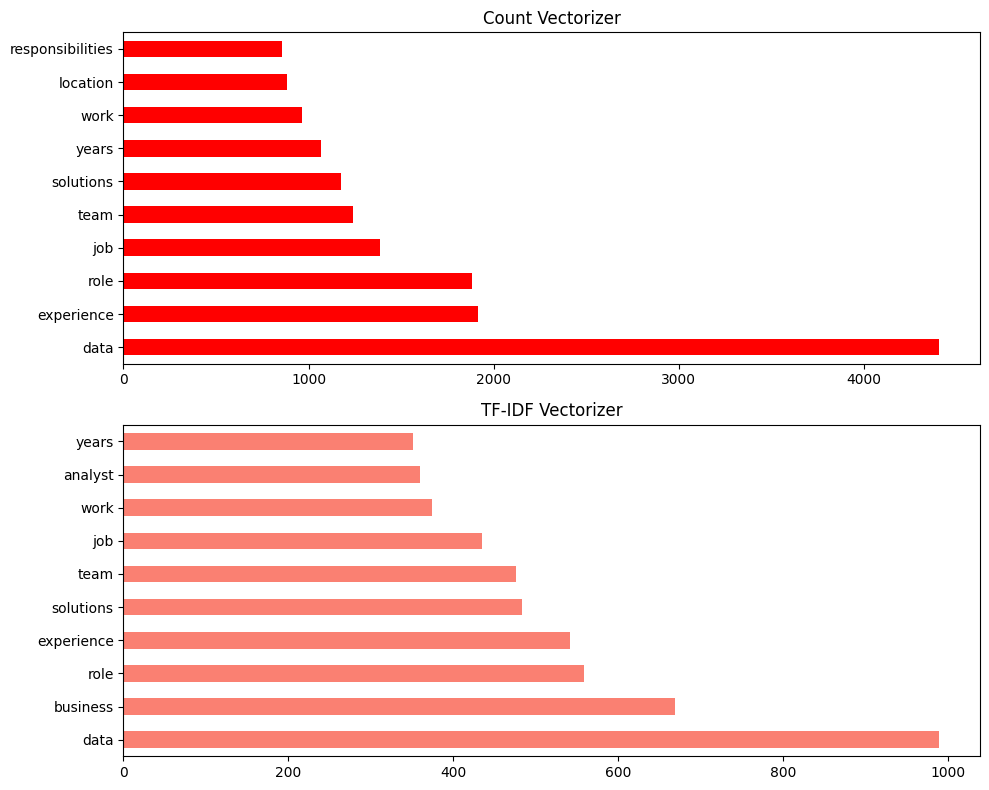

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
term_freq.tail(10).sort_values().plot(kind='barh', ax=axes[0], color='red')
axes[0].set_title('Count Vectorizer')
axes[0].invert_yaxis()

term_freq4.tail(10).sort_values().plot(kind='barh', ax=axes[1], color='salmon')
axes[1].set_title('TF-IDF Vectorizer')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## Reviewing the data

In [42]:
data.head()

,search_role,title,company,location,description,salary_min,salary_max,created,category,description_cleaned
0,data analyst,Data Analyst,Fuzen IT Solutions,"Hyderabad, Telangana",Company Description Fuzen IT Solutions is a gl...,NaN,NaN,2025-12-05T01:15:54Z,IT Jobs,company description fuzen solution leader leve...
1,data analyst,Data Analyst,Live Connections,"Bangalore, Karnataka",Role - Data Analyst Experience - 6 to 12 years...,NaN,NaN,2025-12-25T13:39:22Z,IT Jobs,role datum analyst experience year work locati...
2,data analyst,Data Analyst,LogFix SCM Solutions Pvt Ltd,"Bangalore, Karnataka",Job Description: Data Analyst – AI Systems Abo...,NaN,NaN,2025-12-24T10:18:38Z,IT Jobs,job description datum analyst system role data...
3,data analyst,Data Analyst,VXI Global Solutions,"Tamil Nadu, India",Job Title: Data Analyst Job Description : As a...,NaN,NaN,2025-12-20T08:59:32Z,IT Jobs,job title datum analyst job description data a...
4,data analyst,Data Analyst,EXL,"Chennai, Tamil Nadu",Data Analyst We are looking for highly motivat...,NaN,NaN,2025-12-12T09:53:35Z,IT Jobs,datum analyst role business consultant team da...


In [43]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [45]:
data.head(1)

,search_role,title,company,location,description,salary_min,salary_max,created,category,description_cleaned
0,data analyst,Data Analyst,Fuzen IT Solutions,"Hyderabad, Telangana",Company Description Fuzen IT Solutions is a gl...,NaN,NaN,2025-12-05T01:15:54Z,IT Jobs,company description fuzen solution leader leve...


In [46]:
data.to_csv('new_jobs_data.csv')

In [47]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [48]:
# from transformers import logging
# from transformers import pipeline

# logging.set_verbosity_error()
# summarizer = pipeline('summarization',
#                              model='facebook/bart-large-cnn',
#                              device='mps'
#                              )

# data['description_cleaned'].apply(summarizer)

In [49]:
data.head()

,search_role,title,company,location,description,salary_min,salary_max,created,category,description_cleaned
0,data analyst,Data Analyst,Fuzen IT Solutions,"Hyderabad, Telangana",Company Description Fuzen IT Solutions is a gl...,NaN,NaN,2025-12-05T01:15:54Z,IT Jobs,company description fuzen solution leader leve...
1,data analyst,Data Analyst,Live Connections,"Bangalore, Karnataka",Role - Data Analyst Experience - 6 to 12 years...,NaN,NaN,2025-12-25T13:39:22Z,IT Jobs,role datum analyst experience year work locati...
2,data analyst,Data Analyst,LogFix SCM Solutions Pvt Ltd,"Bangalore, Karnataka",Job Description: Data Analyst – AI Systems Abo...,NaN,NaN,2025-12-24T10:18:38Z,IT Jobs,job description datum analyst system role data...
3,data analyst,Data Analyst,VXI Global Solutions,"Tamil Nadu, India",Job Title: Data Analyst Job Description : As a...,NaN,NaN,2025-12-20T08:59:32Z,IT Jobs,job title datum analyst job description data a...
4,data analyst,Data Analyst,EXL,"Chennai, Tamil Nadu",Data Analyst We are looking for highly motivat...,NaN,NaN,2025-12-12T09:53:35Z,IT Jobs,datum analyst role business consultant team da...


### Hiring trends across various cities

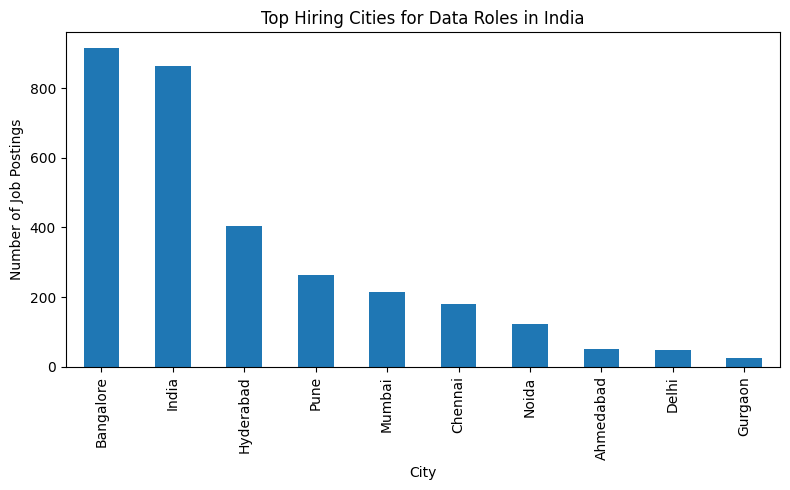

In [50]:
top_cities = data['location'].str.split(",").str[0].str.strip().value_counts().head(10)
plt.figure(figsize=(8,5))
top_cities.plot(kind="bar")
plt.title("Top Hiring Cities for Data Roles in India")
plt.xlabel("City")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("01_top_hiring_cities.png", dpi=300)
plt.show()

### Job Role Description

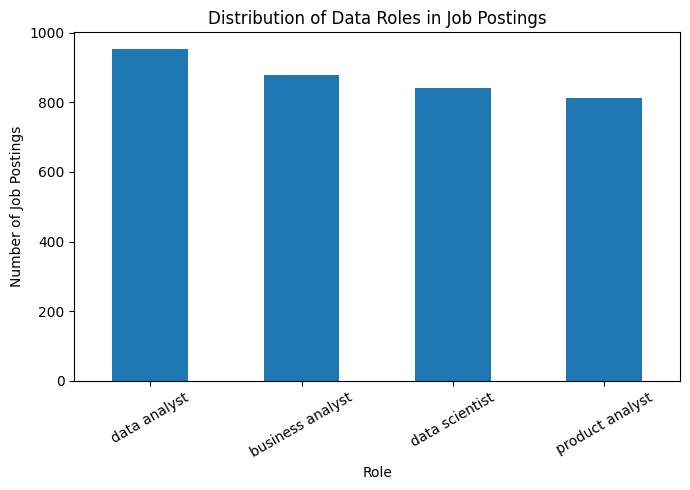

In [51]:
role_counts = data["search_role"].value_counts()

plt.figure(figsize=(7,5))
role_counts.plot(kind="bar")
plt.title("Distribution of Data Roles in Job Postings")
plt.xlabel("Role")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("02_role_distribution.png", dpi=300)
plt.show()

### Skill Frequency

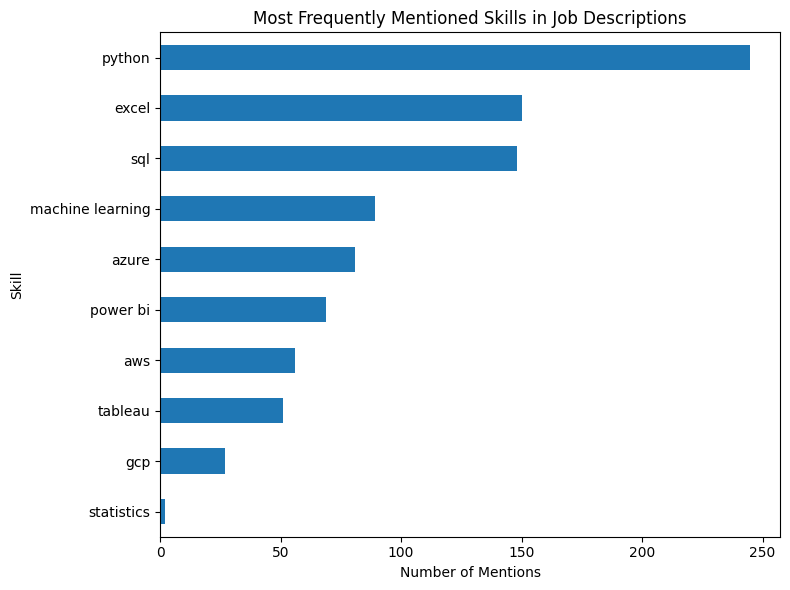

In [52]:
skills = ['sql', 'python', 'excel', 'tableau', 'power bi', 'machine learning', 'statistics',
         'aws', 'azure', 'gcp']

skill_freq = {}
for skill in skills:
    skill_freq[skill] = data["description_cleaned"].str.contains(skill).sum()

skill_series = pd.Series(skill_freq).sort_values(ascending=True)

plt.figure(figsize=(8,6))
skill_series.plot(kind="barh")
plt.title("Most Frequently Mentioned Skills in Job Descriptions")
plt.xlabel("Number of Mentions")
plt.ylabel("Skill")
plt.tight_layout()
plt.savefig("03_skill_frequency.png", dpi=300)
plt.show()

In [65]:
# data["has_salary"] = data[["salary_min", "salary_max"]].notnull().any(axis=1)
# advanced_pattern = "machine learning|deep learning|aws|azure|gcp"
# data["advanced_skill"] = data["description_cleaned"].str.contains(
#     advanced_pattern, regex=True
# )
# salary_disclosure = (
#     data.groupby("advanced_skill")["has_salary"]
#       .mean()
#       .mul(100)
# )

# salary_disclosure.index = ["Basic Skill Roles", "Advanced Skill Roles"]

# plt.figure(figsize=(6,5))
# salary_disclosure.plot(kind="bar")
# plt.title("Salary Disclosure by Skill Complexity")
# plt.xlabel("Role Type")
# plt.ylabel("Jobs with Salary Info (%)")
# plt.ylim(0, 100)
# plt.tight_layout()
# plt.savefig("04_salary_disclosure_vs_skill.png", dpi=300)
# plt.show()

### Salary Distribution

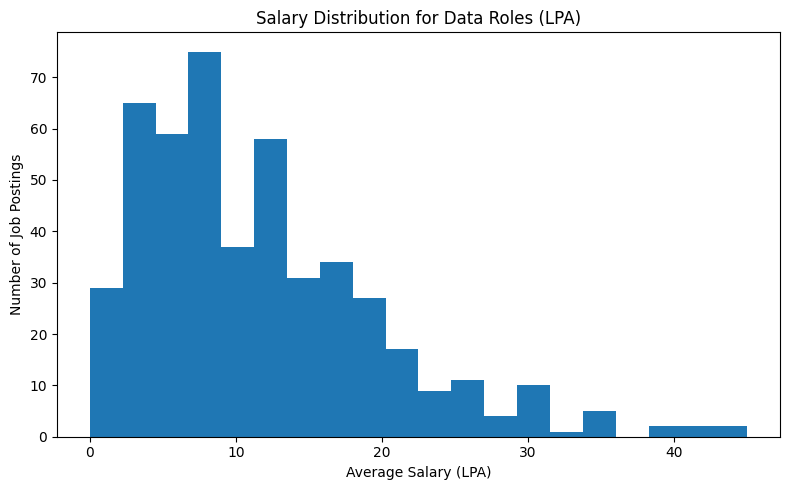

In [55]:
salary_df = data[["salary_min", "salary_max"]].dropna()

salary_df["avg_salary"] = salary_df.mean(axis=1)
salary_df["avg_salary_lpa"] = salary_df["avg_salary"] / 100000  # convert to LPA

plt.figure(figsize=(8,5))
plt.hist(salary_df["avg_salary_lpa"], bins=20)
plt.title("Salary Distribution for Data Roles (LPA)")
plt.xlabel("Average Salary (LPA)")
plt.ylabel("Number of Job Postings")
plt.tight_layout()
plt.savefig("05_salary_distribution.png", dpi=300)
plt.show()

In [61]:
df = pd.read_csv("adzuna_jobs_india_multi_role.csv")

# Ensure description is string and handle missing values
df["description_clean"] = df["description"].fillna("").astype(str)

# Count words in each job description
df["word_count"] = df["description_clean"].apply(lambda x: len(x.split()))

# Average word count
average_word_count = df["word_count"].mean()

print(f"Average word count per job description: {average_word_count:.2f}")

Average word count per job description: 71.81


In [64]:
df['search_role'].nunique()

4

In [63]:
df.head()

,search_role,title,company,location,description,salary_min,salary_max,created,category,description_clean,word_count
0,data analyst,Data Analyst,Fuzen IT Solutions,"Hyderabad, Telangana",Company Description Fuzen IT Solutions is a gl...,NaN,NaN,2025-12-05T01:15:54Z,IT Jobs,Company Description Fuzen IT Solutions is a gl...,71
1,data analyst,Data Analyst,Live Connections,"Bangalore, Karnataka",Role - Data Analyst Experience - 6 to 12 years...,NaN,NaN,2025-12-25T13:39:22Z,IT Jobs,Role - Data Analyst Experience - 6 to 12 years...,88
2,data analyst,Data Analyst,LogFix SCM Solutions Pvt Ltd,"Bangalore, Karnataka",Job Description: Data Analyst – AI Systems Abo...,NaN,NaN,2025-12-24T10:18:38Z,IT Jobs,Job Description: Data Analyst – AI Systems Abo...,70
3,data analyst,Data Analyst,VXI Global Solutions,"Tamil Nadu, India",Job Title: Data Analyst Job Description : As a...,NaN,NaN,2025-12-20T08:59:32Z,IT Jobs,Job Title: Data Analyst Job Description : As a...,72
4,data analyst,Data Analyst,EXL,"Chennai, Tamil Nadu",Data Analyst We are looking for highly motivat...,NaN,NaN,2025-12-12T09:53:35Z,IT Jobs,Data Analyst We are looking for highly motivat...,80
